# Classification Modelling for Salary Predictor
---

### Table of Contents <a class="anchor" id="toc"></a>

* [Overview](#overview)
* [Importing Libraries](#importinglibraries)
* [Creating Custom Functions](#customfunctions)
* [Classification Modelling](#classification)
    * [Null Model](#null)
    * [Logistic Regression](#logreg)
    * [AdaBoost Classifier](#ada)
    * [Bagging Classifier](#bagc)
    * [Gradient Boosting Classifier](#gbc)
    * [Random Forest Classifier](#rfc)
    * [Extra Trees Classifier](#etc)
    * [Support Vector Machine for Classification](#svc)
    * [Summary of metrics for Classification Modelling](#summary)    
* [NLP Classification Modelling](#classificationnlp)
    * [Null Model](#nullnlp)
    * [Logistic Regression](#logregnlp)
    * [AdaBoost Classifier](#adanlp)
    * [Bagging Classifier](#bagcnlp)
    * [Gradient Boosting Classifier](#gbcnlp)
    * [Random Forest Classifier](#rfcnlp)
    * [Extra Trees Classifier](#etcnlp)
    * [Support Vector Machine for Classification](#svcnlp)
    * [Multinomial Naive Bayes](#nbnlp)
    * [Summary of metrics for NLP Classification Modelling](#summarynlp) 
* [Conclusions & Recommendations](#conclusions)


## Overview <a class="anchor" id="overview"></a>
---
[Back to top!](#toc)

### Metrics used for Classifier Model Evaluation

* Accuracy Score (i.e. Test Score)
    * Goal: Get Accuracy as close to 1 as possible. 
* ROC AUC Score
    * Goal: Get ROC AUC as close to 1 as possible.

## Importing Libraries <a class="anchor" id="importinglibraries"></a>
---
[Back to top!](#toc)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, plot_roc_curve

from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
# limit floats to 3 decimal points

## Custom Functions <a class="anchor" id="customfunctions"></a>
---
[Back to top!](#toc)

In [2]:
def get_scores(model_name, pipeline):
    print(model_name)
    print('------------')
    train_score = pipeline.score(X_train, y_train)
    print(f'Training score: {round(train_score, 4)}')
    test_score = pipeline.score(X_test, y_test)
    print(f'Testing score: {round(test_score, 4)}')

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

def get_evaluation_metrics(model_name, cm, preds):
    print(model_name)
    print('------------')
    print("True Negatives: %s" % tn)
    print("False Positives: %s" % fp)
    print("False Negatives: %s" % fn)
    print("True Positives: %s" % tp)
    print()
    
    # accuracy = (tn + tp) / (tn + fp + fn + tp) 
    accuracy = accuracy_score(y_test, preds) 
    print(f'Accuracy: {round(accuracy, 4)}')
    
    specificity = tn / (tn + fp)
    print(f'Specificity: {round(specificity, 4)}')
    
    # sensitivity = tp / (tp + fn)
    sensitivity = recall_score(y_test, preds)
    print(f'Sensitivity: {round(sensitivity, 4)}')
    
    # precision = tp / (tp + fp)
    precision = precision_score(y_test, preds)
    print(f'Precision: {round(precision, 4)}')
    
    # f1score = 2 * (precision*sensitivity) / (precision + sensitivity)
    f1score = f1_score(y_test, preds)
    print(f'F1 score: {round(f1score, 4)}')
    
    roc_auc = roc_auc_score(y_test, preds)
    print(f'ROC AUC score: {round(roc_auc, 4)}')

## Classification Modelling <a class="anchor" id="classification"></a>
---
[Back to top!](#toc)

In [4]:
df_v3 = pd.read_csv('../data/modelling_dataset_v3.csv')
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969 entries, 0 to 3968
Data columns (total 92 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   minimum_years_experience           3969 non-null   int64  
 1   days_new_posting_closing           3969 non-null   float64
 2   days_original_posting_closing      3969 non-null   float64
 3   job_title_wordcount                3969 non-null   int64  
 4   job_title_charcount                3969 non-null   int64  
 5   job_description_wordcount          3969 non-null   int64  
 6   job_description_charcount          3969 non-null   int64  
 7   skills_num                         3969 non-null   int64  
 8   skill_tableau                      3969 non-null   int64  
 9   skill_datawarehouse                3969 non-null   int64  
 10  skill_agile                        3969 non-null   int64  
 11  skill_aws                          3969 non-null   int64

### Null Model <a class="anchor" id="null"></a>
[Back to top!](#toc)

In [5]:
features = [col for col in df_v3.columns if col != 'salary_above_median']
X = df_v3[features]
y = df_v3['salary_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [6]:
# baseline accuracy
y_test.value_counts(normalize=True)

0   0.514
1   0.486
Name: salary_above_median, dtype: float64

### Logistic Regression <a class="anchor" id="logreg"></a>
[Back to top!](#toc)

In [7]:
features = [col for col in df_v3.columns if col != 'salary_above_median']
X = df_v3[features]
y = df_v3['salary_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [8]:
get_scores('Logistic Regression', logreg)

# keeping variable for summary input later
train_score_logreg = logreg.score(X_train, y_train)

Logistic Regression
------------
Training score: 0.6683
Testing score: 0.6344


Logistic Regression
------------
True Negatives: 334
False Positives: 176
False Negatives: 187
True Positives: 296

Accuracy: 0.6344
Specificity: 0.6549
Sensitivity: 0.6128
Precision: 0.6271
F1 score: 0.6199
ROC AUC score: 0.6339


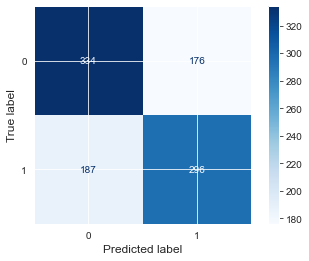

In [9]:
# Get predictions
preds_logreg = logreg.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_logreg).ravel()
cm_logreg = tn, fp, fn, tp 
get_evaluation_metrics('Logistic Regression', cm_logreg, preds_logreg)

# keeping variable for summary input later
spec_logreg = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d');

In [10]:
list_of_lists = logreg.coef_
flattened = [val for sublist in list_of_lists for val in sublist]
len(flattened)

logreg_coef = pd.DataFrame(set(zip(features, flattened))).sort_values(by=[1], ascending=True)
logreg_coef.columns = ['features', 'coefficients']
logreg_coef.head()

,features,coefficients
43,minimum_years_experience,-0.419
26,position_level_junior executive,-0.264
86,position_level_entry level,-0.251
32,categories_events,-0.198
48,categories_entertainment,-0.181


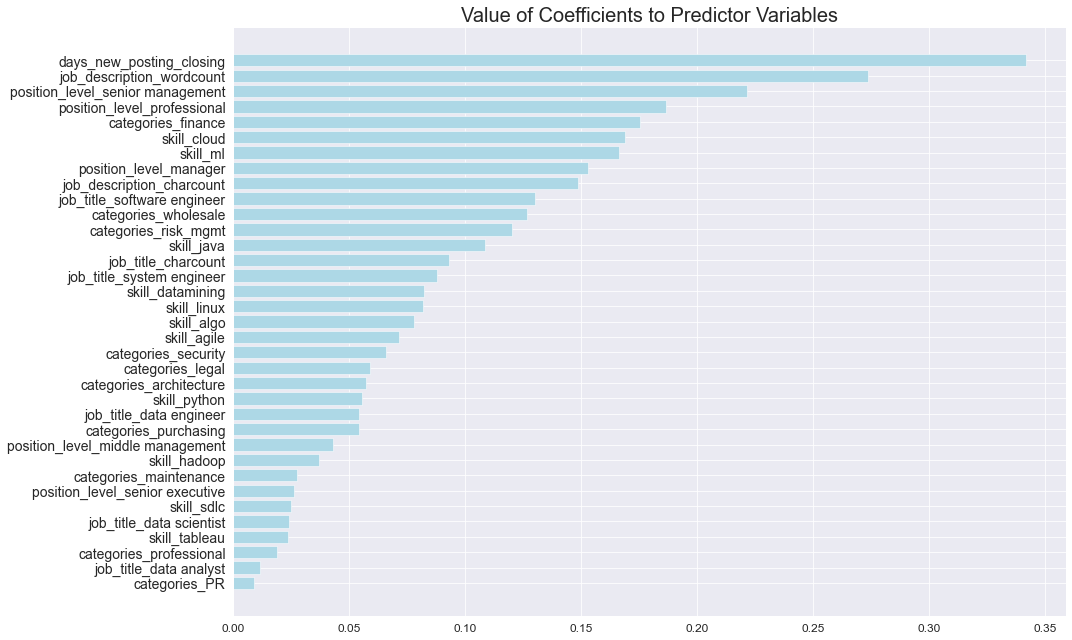

In [11]:
fig, axes = plt.subplots(figsize=(15,9))
plt.barh(y=logreg_coef.features.tail(35), width=logreg_coef.coefficients.tail(35), color='lightblue')

plt.title(label = 'Value of Coefficients to Predictor Variables', fontsize = 20)

# plt.xlabel("Count", fontsize=16)
# plt.xticks(rotation=45)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

# plt.ylabel("Technical skills sought after by Employers", fontsize=16)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

plt.tight_layout()
plt.savefig('../images/logreg_coef_barplot.png', 
            dpi = 150)
plt.show()

### AdaBoost Classifier <a class="anchor" id="ada"></a>
[Back to top!](#toc)

In [12]:
features = [col for col in df_v3.columns if col != 'salary_above_median']
X = df_v3[features]
y = df_v3['salary_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

ada = AdaBoostClassifier(n_estimators=500, random_state=123)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500, random_state=123)

In [13]:
get_scores('AdaBoost Classifier', ada)

# keeping variable for summary input later
train_score_ada = ada.score(X_train, y_train)

AdaBoost Classifier
------------
Training score: 0.7272
Testing score: 0.6385


AdaBoost Classifier
------------
True Negatives: 349
False Positives: 161
False Negatives: 198
True Positives: 285

Accuracy: 0.6385
Specificity: 0.6843
Sensitivity: 0.5901
Precision: 0.639
F1 score: 0.6136
ROC AUC score: 0.6372


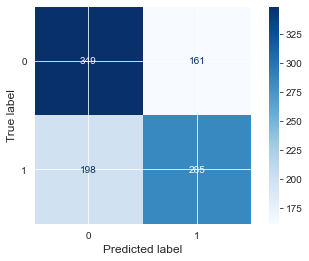

In [14]:
# Get predictions
preds_ada = ada.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_ada).ravel()
cm_ada = tn, fp, fn, tp 
get_evaluation_metrics('AdaBoost Classifier', cm_ada, preds_ada)

# keeping variable for summary input later
spec_ada = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(ada, X_test, y_test, cmap='Blues', values_format='d');

### Bagging Classifier <a class="anchor" id="bagc"></a>
[Back to top!](#toc)

In [15]:
features = [col for col in df_v3.columns if col != 'salary_above_median']
X = df_v3[features]
y = df_v3['salary_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

bagc = BaggingClassifier(n_estimators=200, random_state=123)
bagc.fit(X_train, y_train)

BaggingClassifier(n_estimators=200, random_state=123)

In [16]:
get_scores('Bagging Classifier', bagc)

# keeping variable for summary input later
train_score_bagc = bagc.score(X_train, y_train)

Bagging Classifier
------------
Training score: 0.9983
Testing score: 0.6737


Random Forest Classifier
------------
True Negatives: 374
False Positives: 136
False Negatives: 188
True Positives: 295

Accuracy: 0.6737
Specificity: 0.7333
Sensitivity: 0.6108
Precision: 0.6845
F1 score: 0.6455
ROC AUC score: 0.672


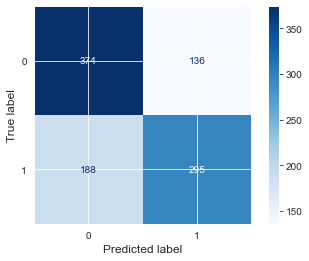

In [17]:
# Get predictions
preds_bagc = bagc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_bagc).ravel()
cm_bagc = tn, fp, fn, tp 
get_evaluation_metrics('Random Forest Classifier', cm_bagc, preds_bagc)

# keeping variable for summary input later
spec_bagc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(bagc, X_test, y_test, cmap='Blues', values_format='d');

### Gradient Boosting Classifier <a class="anchor" id="gbc"></a>
[Back to top!](#toc)

In [18]:
features = [col for col in df_v3.columns if col != 'salary_above_median']
X = df_v3[features]
y = df_v3['salary_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=10, random_state=123)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=10, n_estimators=500,
                           random_state=123)

In [19]:
get_scores('Gradient Boosting Classifier', gbc)

# keeping variable for summary input later
train_score_gbc = gbc.score(X_train, y_train)

Gradient Boosting Classifier
------------
Training score: 0.9983
Testing score: 0.6636


Gradient Boosting Classifier
------------
True Negatives: 365
False Positives: 145
False Negatives: 189
True Positives: 294

Accuracy: 0.6636
Specificity: 0.7157
Sensitivity: 0.6087
Precision: 0.6697
F1 score: 0.6377
ROC AUC score: 0.6622


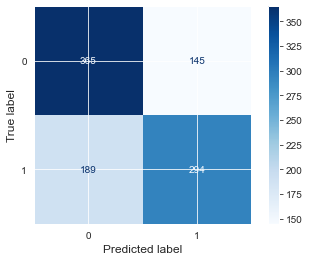

In [20]:
# Get predictions
preds_gbc = gbc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_gbc).ravel()
cm_gbc = tn, fp, fn, tp 
get_evaluation_metrics('Gradient Boosting Classifier', cm_gbc, preds_gbc)

# keeping variable for summary input later
spec_gbc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(gbc, X_test, y_test, cmap='Blues', values_format='d');

### Random Forest Classifier <a class="anchor" id="rfc"></a>
[Back to top!](#toc)

In [21]:
features = [col for col in df_v3.columns if col != 'salary_above_median']
X = df_v3[features]
y = df_v3['salary_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

rfc = RandomForestClassifier(max_depth=20)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [22]:
get_scores('Random Forest Classifier', rfc)

# keeping variable for summary input later
train_score_rfc = rfc.score(X_train, y_train)

Random Forest Classifier
------------
Training score: 0.9792
Testing score: 0.6506


Random Forest Classifier
------------
True Negatives: 376
False Positives: 134
False Negatives: 213
True Positives: 270

Accuracy: 0.6506
Specificity: 0.7373
Sensitivity: 0.559
Precision: 0.6683
F1 score: 0.6088
ROC AUC score: 0.6481


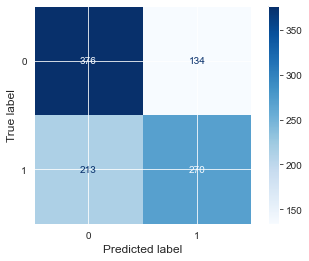

In [23]:
# Get predictions
preds_rfc = rfc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_rfc).ravel()
cm_rfc = tn, fp, fn, tp 
get_evaluation_metrics('Random Forest Classifier', cm_rfc, preds_rfc)

# keeping variable for summary input later
spec_rfc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(rfc, X_test, y_test, cmap='Blues', values_format='d');

### Extra Trees Classifier <a class="anchor" id="etc"></a>
[Back to top!](#toc)

In [24]:
features = [col for col in df_v3.columns if col != 'salary_above_median']
X = df_v3[features]
y = df_v3['salary_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

etc = ExtraTreesClassifier(n_estimators=60, random_state=123)
etc.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=60, random_state=123)

In [25]:
get_scores('Extra Trees Classifier', etc)

# keeping variable for summary input later
train_score_etc = etc.score(X_train, y_train)

Extra Trees Classifier
------------
Training score: 0.9983
Testing score: 0.6697


Extra Trees Classifier
------------
True Negatives: 364
False Positives: 146
False Negatives: 182
True Positives: 301

Accuracy: 0.6697
Specificity: 0.7137
Sensitivity: 0.6232
Precision: 0.6734
F1 score: 0.6473
ROC AUC score: 0.6685


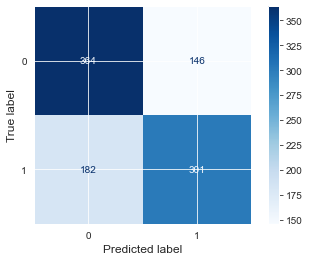

In [26]:
# Get predictions
preds_etc = etc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_etc).ravel()
cm_etc = tn, fp, fn, tp 
get_evaluation_metrics('Extra Trees Classifier', cm_etc, preds_etc)

# keeping variable for summary input later
spec_etc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(etc, X_test, y_test, cmap='Blues', values_format='d');

### Support Vector Machine for Classification <a class="anchor" id="svc"></a>
[Back to top!](#toc)

In [27]:
features = [col for col in df_v3.columns if col != 'salary_above_median']
X = df_v3[features]
y = df_v3['salary_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [28]:
get_scores('Support Vector Machine for Classification', svc)

# keeping variable for summary input later
train_score_svc = svc.score(X_train, y_train)

Support Vector Machine for Classification
------------
Training score: 0.7658
Testing score: 0.6375


Support Vector Machine for Classification
------------
True Negatives: 357
False Positives: 153
False Negatives: 207
True Positives: 276

Accuracy: 0.6375
Specificity: 0.7
Sensitivity: 0.5714
Precision: 0.6434
F1 score: 0.6053
ROC AUC score: 0.6357


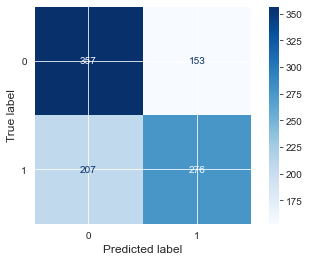

In [29]:
# Get predictions
preds_svc = svc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_svc).ravel()
cm_svc = tn, fp, fn, tp 
get_evaluation_metrics('Support Vector Machine for Classification', cm_svc, preds_svc)

# keeping variable for summary input later
spec_svc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(svc, X_test, y_test, cmap='Blues', values_format='d');

### Summary of metrics for classification modelling <a class="anchor" id="summary"></a>
[Back to top!](#toc)

In [30]:
# list of dict
summary = [{'Model': 'Null Model', 
            'Train Score': 'n/a', 
            'Test Score': 0.514,
            'Precision': 'n/a', 
            'Specificity': 'n/a',
            'Recall': 'n/a',
            'F1 Score': 'n/a', 
            'ROC AUC Score': 'n/a'},
           {'Model': 'Logistic Regression', 
            'Train Score': train_score_logreg, 
            'Test Score': accuracy_score(y_test, preds_logreg),
            'Precision': precision_score(y_test, preds_logreg), 
            'Specificity': spec_logreg,
            'Recall': recall_score(y_test, preds_logreg),
            'F1 Score': f1_score(y_test, preds_logreg), 
            'ROC AUC Score': roc_auc_score(y_test, preds_logreg)},
           {'Model': 'AdaBoost Classifer', 
            'Train Score': train_score_ada, 
            'Test Score': accuracy_score(y_test, preds_ada),
            'Precision': precision_score(y_test, preds_ada), 
            'Specificity': spec_ada,
            'Recall': recall_score(y_test, preds_ada),
            'F1 Score': f1_score(y_test, preds_ada), 
            'ROC AUC Score': roc_auc_score(y_test, preds_ada)}, 
           {'Model': 'Bagging Classifier', 
            'Train Score': train_score_bagc, 
            'Test Score': accuracy_score(y_test, preds_bagc),
            'Precision': precision_score(y_test, preds_bagc), 
            'Specificity': spec_bagc,
            'Recall': recall_score(y_test, preds_bagc),
            'F1 Score': f1_score(y_test, preds_bagc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_bagc)},
           {'Model': 'Gradient Boosting Classifier', 
            'Train Score': train_score_gbc, 
            'Test Score': accuracy_score(y_test, preds_gbc),
            'Precision': precision_score(y_test, preds_gbc), 
            'Specificity': spec_gbc,
            'Recall': recall_score(y_test, preds_gbc),
            'F1 Score': f1_score(y_test, preds_gbc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_gbc)},
           {'Model': 'Random Forest Classifier', 
            'Train Score': train_score_rfc, 
            'Test Score': accuracy_score(y_test, preds_rfc),
            'Precision': precision_score(y_test, preds_rfc), 
            'Specificity': spec_rfc,
            'Recall': recall_score(y_test, preds_rfc),
            'F1 Score': f1_score(y_test, preds_rfc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_rfc)},
           {'Model': 'Extra Trees Classifier', 
            'Train Score': train_score_etc, 
            'Test Score': accuracy_score(y_test, preds_etc),
            'Precision': precision_score(y_test, preds_etc), 
            'Specificity': spec_etc,
            'Recall': recall_score(y_test, preds_etc),
            'F1 Score': f1_score(y_test, preds_etc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_etc)},
           {'Model': 'SVM for Classification', 
            'Train Score': train_score_svc, 
            'Test Score': accuracy_score(y_test, preds_svc),
            'Precision': precision_score(y_test, preds_svc), 
            'Specificity': spec_svc,
            'Recall': recall_score(y_test, preds_svc),
            'F1 Score': f1_score(y_test, preds_svc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_svc)}]

summary_v3 = pd.DataFrame(summary)
summary_v3.round(4) # rounding off values to 4 decimal places

,Model,Train Score,Test Score,Precision,Specificity,Recall,F1 Score,ROC AUC Score
0,Null Model,n/a,0.514,n/a,n/a,n/a,n/a,n/a
1,Logistic Regression,0.668,0.634,0.627,0.655,0.613,0.620,0.634
2,AdaBoost Classifer,0.727,0.638,0.639,0.684,0.590,0.614,0.637
3,Bagging Classifier,0.998,0.674,0.684,0.733,0.611,0.646,0.672
4,Gradient Boosting Classifier,0.998,0.664,0.670,0.716,0.609,0.638,0.662
5,Random Forest Classifier,0.979,0.651,0.668,0.737,0.559,0.609,0.648
6,Extra Trees Classifier,0.998,0.670,0.673,0.714,0.623,0.647,0.668
7,SVM for Classification,0.766,0.637,0.643,0.700,0.571,0.605,0.636


In [31]:
# exporting .csv for executive summary at the top
summary_v3.to_csv('../data/model_metrics_v3.csv', index=False)

## Classification Modelling for NLP <a class="anchor" id="classificationnlp"></a>
---
[Back to top!](#toc)

In [32]:
df_v4 = pd.read_csv('../data/modelling_dataset_v4.csv')
df_v4.head()

,job_title,salary_above_median
0,Senior Derivatives XA Market Data Engineer At ...,1
1,IT - Business Analyst (Data Analytics and Mach...,0
2,Junior Data Analyst (Finance / Python) - up to...,0
3,Data Analytics Consultant This TMCA* (TeSA Mid...,0
4,(IT)- Data science analyst We are a top 8 glob...,1


In [33]:
X = df_v4['job_title']
y = df_v4['salary_above_median']

# balanced classes in dataset
y.value_counts(normalize=True)

0   0.517
1   0.483
Name: salary_above_median, dtype: float64

### Null Model <a class="anchor" id="nullnlp"></a>
[Back to top!](#toc)

In [34]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# baseline accuracy
y_test.value_counts(normalize=True)

0   0.514
1   0.486
Name: salary_above_median, dtype: float64

### Logistic Regression <a class="anchor" id="logregnlp"></a>
[Back to top!](#toc)

In [35]:
# redefining training and testing sets with same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Setting up pipeline for model
# 1. CountVectorizer (transformer)
# 2. Logistic Regression (estimator)
pipe_cvec_logreg = Pipeline([('cvec', CountVectorizer(stop_words=('english'))),
                             ('logreg', LogisticRegression(solver='liblinear'))])

# Fitting the pipeline
pipe_cvec_logreg.fit(X_train, y_train)

# uncomment to see params
# pipe_cvec_logreg.get_params()

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [36]:
get_scores('Logistic Regression (cvec)', pipe_cvec_logreg)

# keeping variable for summary input later
train_score_cvec_logreg = pipe_cvec_logreg.score(X_train, y_train)

Logistic Regression (cvec)
------------
Training score: 0.9892
Testing score: 0.7049


Logistic Regression (cvec)
------------
True Negatives: 378
False Positives: 132
False Negatives: 161
True Positives: 322

Accuracy: 0.7049
Specificity: 0.7412
Sensitivity: 0.6667
Precision: 0.7093
F1 score: 0.6873
ROC AUC score: 0.7039


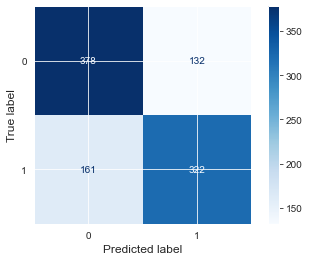

In [37]:
# Get predictions
preds_cvec_logreg = pipe_cvec_logreg.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cvec_logreg).ravel()
cm_cvec_logreg = tn, fp, fn, tp 
get_evaluation_metrics('Logistic Regression (cvec)', cm_cvec_logreg, preds_cvec_logreg)

# keeping variable for summary input later
spec_cvec_logreg = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(pipe_cvec_logreg, X_test, y_test, cmap='Blues', values_format='d');

### AdaBoost Classifier <a class="anchor" id="adanlp"></a>
[Back to top!](#toc)

In [38]:
# redefining training and testing sets with same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Setting up pipeline for model
# 1. CountVectorizer (transformer)
# 2. AdaBoost Classifier (estimator)
pipe_cvec_ada = Pipeline([('cvec', CountVectorizer(stop_words=('english'))),
                          ('ada', AdaBoostClassifier(n_estimators=500, random_state=123))])

# Fitting the pipeline
pipe_cvec_ada.fit(X_train, y_train)

# uncomment to see params
# pipe_cvec_ada.get_params()

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('ada',
                 AdaBoostClassifier(n_estimators=500, random_state=123))])

In [39]:
get_scores('AdaBoost Classifier (cvec)', pipe_cvec_ada)

# keeping variable for summary input later
train_score_cvec_ada = pipe_cvec_ada.score(X_train, y_train)

AdaBoost Classifier (cvec)
------------
Training score: 0.9425
Testing score: 0.6888


AdaBoost Classifier (cvec)
------------
True Negatives: 377
False Positives: 133
False Negatives: 176
True Positives: 307

Accuracy: 0.6888
Specificity: 0.7392
Sensitivity: 0.6356
Precision: 0.6977
F1 score: 0.6652
ROC AUC score: 0.6874


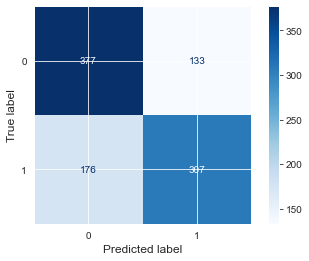

In [40]:
# Get predictions
preds_cvec_ada = pipe_cvec_ada.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cvec_ada).ravel()
cm_cvec_ada = tn, fp, fn, tp 
get_evaluation_metrics('AdaBoost Classifier (cvec)', cm_cvec_ada, preds_cvec_ada)

# keeping variable for summary input later
spec_cvec_ada = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(pipe_cvec_ada, X_test, y_test, cmap='Blues', values_format='d');

### Bagging Classifier <a class="anchor" id="bagcnlp"></a>
[Back to top!](#toc)

In [41]:
# redefining training and testing sets with same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Setting up pipeline for model
# 1. CountVectorizer (transformer)
# 2. Bagging Classifier (estimator)
pipe_cvec_bagc = Pipeline([('cvec', CountVectorizer(stop_words=('english'))),
                           ('bagc', BaggingClassifier(n_estimators=200, random_state=123))])

# Fitting the pipeline
pipe_cvec_bagc.fit(X_train, y_train)

# uncomment to see params
# pipe_cvec_bagc.get_params()

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('bagc',
                 BaggingClassifier(n_estimators=200, random_state=123))])

In [42]:
get_scores('Bagging Classifier (cvec)', pipe_cvec_bagc)

# keeping variable for summary input later
train_score_cvec_bagc = pipe_cvec_bagc.score(X_train, y_train)

Bagging Classifier (cvec)
------------
Training score: 0.9963
Testing score: 0.7009


Bagging Classifier (cvec)
------------
True Negatives: 377
False Positives: 133
False Negatives: 164
True Positives: 319

Accuracy: 0.7009
Specificity: 0.7392
Sensitivity: 0.6605
Precision: 0.7058
F1 score: 0.6824
ROC AUC score: 0.6998


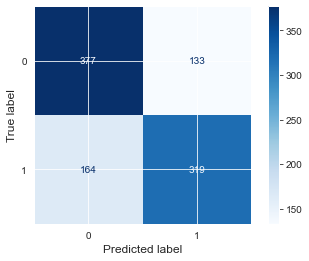

In [43]:
# Get predictions
preds_cvec_bagc = pipe_cvec_bagc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cvec_bagc).ravel()
cm_cvec_bagc = tn, fp, fn, tp 
get_evaluation_metrics('Bagging Classifier (cvec)', cm_cvec_bagc, preds_cvec_bagc)

# keeping variable for summary input later
spec_cvec_bagc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(pipe_cvec_bagc, X_test, y_test, cmap='Blues', values_format='d');

### Gradient Boosting Classifier <a class="anchor" id="gbcnlp"></a>
[Back to top!](#toc)

In [44]:
# redefining training and testing sets with same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Setting up pipeline for model
# 1. CountVectorizer (transformer)
# 2. Gradient Boosting Classifier (estimator)
pipe_cvec_gbc = Pipeline([('cvec', CountVectorizer(stop_words=('english'))),
                          ('gbc', GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, 
                                                             max_depth=10, random_state=123))])

# Fitting the pipeline
pipe_cvec_gbc.fit(X_train, y_train)

# uncomment to see params
# pipe_cvec_gbc.get_params()

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=10,
                                            n_estimators=500,
                                            random_state=123))])

In [45]:
get_scores('Gradient Boosting Classifier (cvec)', pipe_cvec_gbc)

# keeping variable for summary input later
train_score_cvec_gbc = pipe_cvec_gbc.score(X_train, y_train)

Gradient Boosting Classifier (cvec)
------------
Training score: 0.9963
Testing score: 0.721


Gradient Boosting Classifier (cvec)
------------
True Negatives: 390
False Positives: 120
False Negatives: 157
True Positives: 326

Accuracy: 0.721
Specificity: 0.7647
Sensitivity: 0.6749
Precision: 0.7309
F1 score: 0.7018
ROC AUC score: 0.7198


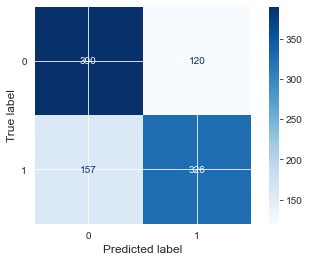

In [46]:
# Get predictions
preds_cvec_gbc = pipe_cvec_gbc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cvec_gbc).ravel()
cm_cvec_gbc = tn, fp, fn, tp 
get_evaluation_metrics('Gradient Boosting Classifier (cvec)', cm_cvec_gbc, preds_cvec_gbc)

# keeping variable for summary input later
spec_cvec_gbc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(pipe_cvec_gbc, X_test, y_test, cmap='Blues', values_format='d');

### Random Forest Classifier <a class="anchor" id="rfcnlp"></a>
[Back to top!](#toc)

In [47]:
# redefining training and testing sets with same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Setting up pipeline for model
# 1. CountVectorizer (transformer)
# 2. Random Forest Classifier (estimator)
pipe_cvec_rfc = Pipeline([('cvec', CountVectorizer(stop_words=('english'))),
                          ('rfc', RandomForestClassifier(max_depth=20))])

# Fitting the pipeline
pipe_cvec_rfc.fit(X_train, y_train)

# uncomment to see params
# pipe_cvec_rfc.get_params()

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('rfc', RandomForestClassifier(max_depth=20))])

In [48]:
get_scores('Random Forest Classifier (cvec)', pipe_cvec_rfc)

# keeping variable for summary input later
train_score_cvec_rfc = pipe_cvec_rfc.score(X_train, y_train)

Random Forest Classifier (cvec)
------------
Training score: 0.9368
Testing score: 0.6989


Random Forest Classifier (cvec)
------------
True Negatives: 410
False Positives: 100
False Negatives: 199
True Positives: 284

Accuracy: 0.6989
Specificity: 0.8039
Sensitivity: 0.588
Precision: 0.7396
F1 score: 0.6551
ROC AUC score: 0.696


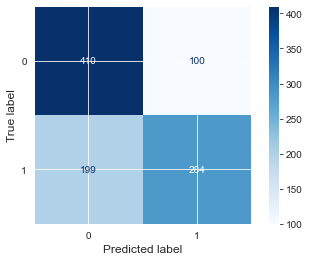

In [49]:
# Get predictions
preds_cvec_rfc = pipe_cvec_rfc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cvec_rfc).ravel()
cm_cvec_rfc = tn, fp, fn, tp 
get_evaluation_metrics('Random Forest Classifier (cvec)', cm_cvec_rfc, preds_cvec_rfc)

# keeping variable for summary input later
spec_cvec_rfc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(pipe_cvec_rfc, X_test, y_test, cmap='Blues', values_format='d');

### Extra Trees Classifier <a class="anchor" id="etcnlp"></a>
[Back to top!](#toc)

In [50]:
# redefining training and testing sets with same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Setting up pipeline for model
# 1. CountVectorizer (transformer)
# 2. Extra Trees Classifier (estimator)
pipe_cvec_etc = Pipeline([('cvec', CountVectorizer(stop_words=('english'))),
                          ('etc', ExtraTreesClassifier(n_estimators=60, random_state=123))])

# Fitting the pipeline
pipe_cvec_etc.fit(X_train, y_train)

# uncomment to see params
# pipe_cvec_etc.get_params()

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('etc',
                 ExtraTreesClassifier(n_estimators=60, random_state=123))])

In [51]:
get_scores('Extra Trees Classifier (cvec)', pipe_cvec_etc)

# keeping variable for summary input later
train_score_cvec_etc = pipe_cvec_etc.score(X_train, y_train)

Extra Trees Classifier (cvec)
------------
Training score: 0.9963
Testing score: 0.711


Extra Trees Classifier (cvec)
------------
True Negatives: 392
False Positives: 118
False Negatives: 169
True Positives: 314

Accuracy: 0.711
Specificity: 0.7686
Sensitivity: 0.6501
Precision: 0.7269
F1 score: 0.6863
ROC AUC score: 0.7094


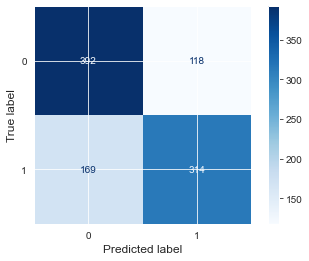

In [52]:
# Get predictions
preds_cvec_etc = pipe_cvec_etc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cvec_etc).ravel()
cm_cvec_etc = tn, fp, fn, tp 
get_evaluation_metrics('Extra Trees Classifier (cvec)', cm_cvec_etc, preds_cvec_etc)

# keeping variable for summary input later
spec_cvec_etc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(pipe_cvec_etc, X_test, y_test, cmap='Blues', values_format='d');

### Support Vector Machine for Classification <a class="anchor" id="svcnlp"></a>
[Back to top!](#toc)

In [ ]:
# redefining training and testing sets with same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Setting up pipeline for model
# 1. CountVectorizer (transformer)
# 2. SVM for Classification (estimator)
pipe_cvec_svc = Pipeline([('cvec', CountVectorizer(stop_words=('english'))),
                          ('svc', SVC(gamma='auto'))])

# Fitting the pipeline
pipe_cvec_svc.fit(X_train, y_train)

# uncomment to see params
# pipe_cvec_svc.get_params()

In [ ]:
get_scores('Support Vector Machine for Classification (cvec)', pipe_cvec_svc)

# keeping variable for summary input later
train_score_cvec_svc = pipe_cvec_svc.score(X_train, y_train)

In [ ]:
# Get predictions
preds_cvec_svc = pipe_cvec_svc.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cvec_etc).ravel()
cm_cvec_svc = tn, fp, fn, tp 
get_evaluation_metrics('Support Vector Machine for Classification (cvec)', cm_cvec_svc, preds_cvec_svc)

# keeping variable for summary input later
spec_cvec_svc = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(pipe_cvec_svc, X_test, y_test, cmap='Blues', values_format='d');

### Multinomial Naive Bayes <a class="anchor" id="nbnlp"></a>
[Back to top!](#toc)

In [ ]:
# redefining training and testing sets with same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Setting up pipeline for model
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)
pipe_cvec_nb = Pipeline([('cvec', CountVectorizer(stop_words=('english'))),
                         ('nb', MultinomialNB())])

# Fitting the pipeline
pipe_cvec_nb.fit(X_train, y_train)

# uncomment to see params
# pipe_cvec_nb.get_params()

In [ ]:
get_scores('Multinomial Naive Bayes (cvec)', pipe_cvec_nb)

# keeping variable for summary input later
train_score_cvec_nb = pipe_cvec_nb.score(X_train, y_train)

In [ ]:
# Get predictions
preds_cvec_nb = pipe_cvec_nb.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_cvec_nb).ravel()
cm_cvec_nb = tn, fp, fn, tp 
get_evaluation_metrics('Multinomial Naive Bayes (cvec)', cm_cvec_nb, preds_cvec_nb)

# keeping variable for summary input later
spec_cvec_nb = tn / (tn + fp)

# visualizing confusion matrix
plot_confusion_matrix(pipe_cvec_nb, X_test, y_test, cmap='Blues', values_format='d');

### Summary of metrics for NLP classification modelling <a class="anchor" id="summarynlp"></a>
[Back to top!](#toc)

In [ ]:
# list of dict
summary = [{'Model': 'Null Model', 
            'Train Score': 'n/a', 
            'Test Score': 0.514,
            'Precision': 'n/a', 
            'Specificity': 'n/a',
            'Recall': 'n/a',
            'F1 Score': 'n/a', 
            'ROC AUC Score': 'n/a'},
           {'Model': 'Logistic Regression (cvec)', 
            'Train Score': train_score_cvec_logreg, 
            'Test Score': accuracy_score(y_test, preds_cvec_logreg),
            'Precision': precision_score(y_test, preds_cvec_logreg), 
            'Specificity': spec_cvec_logreg,
            'Recall': recall_score(y_test, preds_cvec_logreg),
            'F1 Score': f1_score(y_test, preds_cvec_logreg), 
            'ROC AUC Score': roc_auc_score(y_test, preds_cvec_logreg)},
           {'Model': 'AdaBoost Classifer (cvec)', 
            'Train Score': train_score_cvec_ada, 
            'Test Score': accuracy_score(y_test, preds_cvec_ada),
            'Precision': precision_score(y_test, preds_cvec_ada), 
            'Specificity': spec_cvec_ada,
            'Recall': recall_score(y_test, preds_cvec_ada),
            'F1 Score': f1_score(y_test, preds_cvec_ada), 
            'ROC AUC Score': roc_auc_score(y_test, preds_cvec_ada)}, 
           {'Model': 'Bagging Classifier (cvec)', 
            'Train Score': train_score_cvec_bagc, 
            'Test Score': accuracy_score(y_test, preds_cvec_bagc),
            'Precision': precision_score(y_test, preds_cvec_bagc), 
            'Specificity': spec_cvec_bagc,
            'Recall': recall_score(y_test, preds_cvec_bagc),
            'F1 Score': f1_score(y_test, preds_cvec_bagc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_cvec_bagc)},
           {'Model': 'Gradient Boosting Classifier (cvec)', 
            'Train Score': train_score_cvec_gbc, 
            'Test Score': accuracy_score(y_test, preds_cvec_gbc),
            'Precision': precision_score(y_test, preds_cvec_gbc), 
            'Specificity': spec_cvec_gbc,
            'Recall': recall_score(y_test, preds_cvec_gbc),
            'F1 Score': f1_score(y_test, preds_cvec_gbc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_cvec_gbc)},
           {'Model': 'Random Forest Classifier (cvec)', 
            'Train Score': train_score_cvec_rfc, 
            'Test Score': accuracy_score(y_test, preds_cvec_rfc),
            'Precision': precision_score(y_test, preds_cvec_rfc), 
            'Specificity': spec_cvec_rfc,
            'Recall': recall_score(y_test, preds_cvec_rfc),
            'F1 Score': f1_score(y_test, preds_cvec_rfc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_cvec_rfc)},
           {'Model': 'Extra Trees Classifier (cvec)', 
            'Train Score': train_score_cvec_etc, 
            'Test Score': accuracy_score(y_test, preds_cvec_etc),
            'Precision': precision_score(y_test, preds_cvec_etc), 
            'Specificity': spec_cvec_etc,
            'Recall': recall_score(y_test, preds_cvec_etc),
            'F1 Score': f1_score(y_test, preds_cvec_etc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_cvec_etc)},
           {'Model': 'SVM for Classification (cvec)', 
            'Train Score': train_score_cvec_svc, 
            'Test Score': accuracy_score(y_test, preds_cvec_svc),
            'Precision': precision_score(y_test, preds_cvec_svc), 
            'Specificity': spec_cvec_svc,
            'Recall': recall_score(y_test, preds_cvec_svc),
            'F1 Score': f1_score(y_test, preds_cvec_svc), 
            'ROC AUC Score': roc_auc_score(y_test, preds_cvec_svc)},
           {'Model': 'Multinomial Naive Bayes (cvec)', 
            'Train Score': train_score_cvec_nb, 
            'Test Score': accuracy_score(y_test, preds_cvec_nb),
            'Precision': precision_score(y_test, preds_cvec_nb), 
            'Specificity': spec_cvec_nb,
            'Recall': recall_score(y_test, preds_cvec_nb),
            'F1 Score': f1_score(y_test, preds_cvec_nb), 
            'ROC AUC Score': roc_auc_score(y_test, preds_cvec_nb)}]

summary_v4 = pd.DataFrame(summary)
summary_v4.round(4) # rounding off values to 4 decimal places

In [ ]:
# exporting .csv for executive summary at the top
summary_v4.to_csv('../data/model_metrics_v4.csv', index=False)

## Conclusions & Recommendations <a class="anchor" id="conclusions"></a>
---
[Back to top!](#toc)